In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as web
import datetime as dt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,LSTM

In [3]:
#load data
company=['^NSEI']
start=dt.datetime(2014,1,1)
end=dt.datetime(2021,1,1)
data=web.DataReader(company,'yahoo',start,end)


In [4]:
data.to_csv("nifty.csv")

In [5]:
pd.read_csv("nifty.csv")

,Attributes,Adj Close,Close,High,Low,Open,Volume
0,Symbols,^NSEI,^NSEI,^NSEI,^NSEI,^NSEI,^NSEI
1,Date,NaN,NaN,NaN,NaN,NaN,NaN
2,2014-01-02,6221.14990234375,6221.14990234375,6358.2998046875,6211.2998046875,6301.25,158100.0
3,2014-01-03,6211.14990234375,6211.14990234375,6221.7001953125,6171.25,6194.5498046875,139000.0
4,2014-01-06,6191.4501953125,6191.4501953125,6224.7001953125,6170.25,6220.85009765625,118300.0
...,...,...,...,...,...,...,...
1709,2020-12-24,13749.25,13749.25,13771.75,13626.900390625,13672.150390625,471400.0
1710,2020-12-28,13873.2001953125,13873.2001953125,13885.2998046875,13811.5498046875,13815.150390625,403600.0
1711,2020-12-29,13932.599609375,13932.599609375,13967.599609375,13859.900390625,13910.349609375,439600.0
1712,2020-12-30,13981.9501953125,13981.9501953125,13997.0,13864.9501953125,13980.900390625,380700.0


In [6]:
data.head()

Attributes,Adj Close,Close,High,Low,Open,Volume
Symbols,^NSEI,^NSEI,^NSEI,^NSEI,^NSEI,^NSEI
Date,,,,,,
2014-01-02,6221.149902,6221.149902,6358.299805,6211.299805,6301.250000,158100.0
2014-01-03,6211.149902,6211.149902,6221.700195,6171.250000,6194.549805,139000.0
2014-01-06,6191.450195,6191.450195,6224.700195,6170.250000,6220.850098,118300.0
2014-01-07,6162.250000,6162.250000,6221.500000,6144.750000,6203.899902,138600.0
2014-01-08,6174.600098,6174.600098,6192.100098,6160.350098,6178.049805,146900.0


In [7]:
data.tail()

Attributes,Adj Close,Close,High,Low,Open,Volume
Symbols,^NSEI,^NSEI,^NSEI,^NSEI,^NSEI,^NSEI
Date,,,,,,
2020-12-24,13749.250000,13749.250000,13771.750000,13626.900391,13672.150391,471400.0
2020-12-28,13873.200195,13873.200195,13885.299805,13811.549805,13815.150391,403600.0
2020-12-29,13932.599609,13932.599609,13967.599609,13859.900391,13910.349609,439600.0
2020-12-30,13981.950195,13981.950195,13997.000000,13864.950195,13980.900391,380700.0
2020-12-31,13981.750000,13981.750000,14024.849609,13936.450195,13970.000000,452400.0


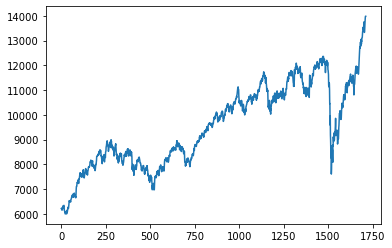

In [8]:
data1=data.reset_index()['Close']

plt.plot(data1)

In [9]:
#prepare data
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(data['Close'].values.reshape(-1,1))


prediction_days=100

x_train= []
y_train= []

for x in range(prediction_days,len(scaled_data)):
    x_train.append(scaled_data[x-prediction_days:x, 0])
    y_train.append(scaled_data[x,0])

x_train,y_train=np.array(x_train),np.array(y_train)
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [10]:
len(x_train),len(y_train)

(1612, 1612)

In [11]:
print(x_train.shape),print(y_train.shape)

(1612, 100, 1)
(1612,)


(None, None)

In [12]:
#Build the model
model=Sequential()

model.add(LSTM(units=50, return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1)) #prediction of the next closing value

model.compile(optimizer='Adam',loss='mean_squared_error')



In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
dropout (Dropout)            (None, 100, 50)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100, 50)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 5

In [14]:
test_output=model.fit(x_train,y_train,epochs=25,batch_size=32)


Train on 1612 samples
Epoch 1/25
1612/1612 [==============================] - 13s 8ms/sample - loss: 0.0230
Epoch 2/25
1612/1612 [==============================] - 8s 5ms/sample - loss: 0.0045
Epoch 3/25
1612/1612 [==============================] - 8s 5ms/sample - loss: 0.0040
Epoch 4/25
1612/1612 [==============================] - 7s 5ms/sample - loss: 0.0037
Epoch 5/25
1612/1612 [==============================] - 8s 5ms/sample - loss: 0.0037
Epoch 6/25
1612/1612 [==============================] - 7s 5ms/sample - loss: 0.0034
Epoch 7/25
1612/1612 [==============================] - 10s 6ms/sample - loss: 0.0031
Epoch 8/25
1612/1612 [==============================] - 8s 5ms/sample - loss: 0.0031
Epoch 9/25
1612/1612 [==============================] - 9s 5ms/sample - loss: 0.0033
Epoch 10/25
1612/1612 [==============================] - 8s 5ms/sample - loss: 0.0029
Epoch 11/25
1612/1612 [==============================] - 9s 5ms/sample - loss: 0.0029
Epoch 12/25
1612/1612 [================

In [15]:
'''Test the Model Accuracy on Existing Data '''
#Load Test Data
from datetime import timedelta
test_start=dt.datetime(2020,1,1)
test_end=dt.datetime.now()

test_data=web.DataReader(company,'yahoo',test_start,test_end)
actual_prices=test_data['Close'].values

total_dataset=pd.concat((data['Close'],test_data['Close']),axis=0)

model_inputs=total_dataset[len(total_dataset)-len(test_data)-prediction_days:].values
model_inputs=model_inputs.reshape(-1,1)
model_inputs=scaler.transform(model_inputs)


In [31]:
#Make predictions on Test Data

x_test=[]

for x in range(prediction_days,len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x,0])
    
x_test=np.array(x_test)
x_test=np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

predicted_prices=model.predict(x_test)
predicted_prices=scaler.inverse_transform(predicted_prices)
#print(predicted_prices)


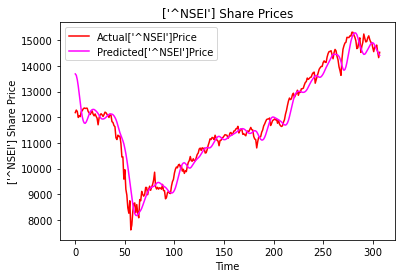

In [32]:
#Plot the Test Prediction
plt.plot(actual_prices,color=("red"),label=f"Actual{company}Price")
plt.plot(predicted_prices,color="magenta",label=f"Predicted{company}Price")
plt.title(f"{company} Share Prices")
plt.xlabel('Time')
plt.ylabel(f'{company} Share Price')
plt.legend()
plt.show()


In [35]:
#Predict next day

print(predicted_prices)
real_data = [model_inputs[len(model_inputs) - prediction_days:len(model_inputs+1),0]]
real_data=np.array(real_data)
real_data=np.reshape(real_data,(real_data.shape[0],real_data.shape[1],1))


prediction=model.predict(real_data)
prediction=scaler.inverse_transform(prediction)


print(f"prediction{prediction}")

[[13689.942 ]
 [13636.073 ]
 [13466.801 ]
 [13211.257 ]
 [12898.795 ]
 [12574.38  ]
 [12272.688 ]
 [12029.704 ]
 [11862.49  ]
 [11776.815 ]
 [11766.5   ]
 [11815.124 ]
 [11904.177 ]
 [12014.502 ]
 [12121.639 ]
 [12208.82  ]
 [12265.658 ]
 [12296.092 ]
 [12309.005 ]
 [12302.443 ]
 [12276.617 ]
 [12241.229 ]
 [12197.54  ]
 [12145.921 ]
 [12076.061 ]
 [12008.273 ]
 [11958.39  ]
 [11934.106 ]
 [11932.287 ]
 [11943.779 ]
 [11966.691 ]
 [12002.085 ]
 [12044.192 ]
 [12083.832 ]
 [12112.118 ]
 [12123.501 ]
 [12126.709 ]
 [12123.167 ]
 [12100.293 ]
 [12057.636 ]
 [11994.252 ]
 [11915.187 ]
 [11805.209 ]
 [11668.755 ]
 [11529.603 ]
 [11401.018 ]
 [11294.087 ]
 [11199.285 ]
 [11087.823 ]
 [10960.272 ]
 [10781.882 ]
 [10580.579 ]
 [10343.381 ]
 [10076.205 ]
 [ 9778.347 ]
 [ 9462.327 ]
 [ 9172.127 ]
 [ 8884.658 ]
 [ 8612.864 ]
 [ 8390.898 ]
 [ 8245.325 ]
 [ 8180.1016]
 [ 8169.364 ]
 [ 8206.131 ]
 [ 8262.35  ]
 [ 8313.181 ]
 [ 8377.52  ]
 [ 8455.606 ]
 [ 8557.612 ]
 [ 8673.199 ]
 [ 8787.165 ]
 [ 889

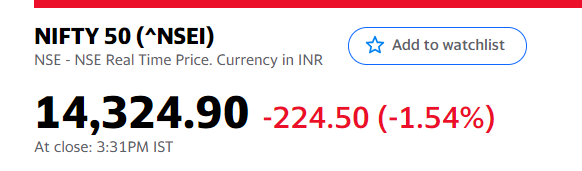

In [21]:
from IPython import display
display.Image("nifty.png")